In [ ]:
!conda install -c conda-forge h3-py

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - h3-py


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    h3-py-3.7.4                |   py39h7a8716b_1         482 KB  conda-forge
    openssl-1.1.1s             |       hfd90126_0         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/osx-64::_anaconda_depends-2022.05-py39_0
  h3-py              conda-forge/osx-64::h3-py-3.7.4-py39h7a8716b_1

The following packages will be UPDATED:

  ca-certificates    main::ca-certificates-2022.3.29-hecd8~ --> conda-forge::ca-certificates-2022.9.24-h033912b_0
  certifi            main/osx-64::certifi-2021.10.8-py39he~ --> conda-forge/noarch::certifi-2022.9.2

In [1]:
import h3

In [2]:
print(h3.__version__)

3.6.4


### lister les méthodes disponibles avec H3

In [3]:
dir(h3)

['H3CellError',
 'H3DistanceError',
 'H3EdgeError',
 'H3ResolutionError',
 'H3ValueError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_cy',
 '_version',
 'api',
 'compact',
 'edge_length',
 'experimental_h3_to_local_ij',
 'experimental_local_ij_to_h3',
 'geo_to_h3',
 'get_destination_h3_index_from_unidirectional_edge',
 'get_h3_indexes_from_unidirectional_edge',
 'get_h3_unidirectional_edge',
 'get_h3_unidirectional_edge_boundary',
 'get_h3_unidirectional_edges_from_hexagon',
 'get_origin_h3_index_from_unidirectional_edge',
 'get_pentagon_indexes',
 'get_res0_indexes',
 'h3',
 'h3_distance',
 'h3_get_base_cell',
 'h3_get_faces',
 'h3_get_resolution',
 'h3_indexes_are_neighbors',
 'h3_is_pentagon',
 'h3_is_res_class_III',
 'h3_is_res_class_iii',
 'h3_is_valid',
 'h3_line',
 'h3_set_to_multi_polygon',
 'h3_to_center_child',
 'h3_to_children',
 'h3_to_geo',
 'h3_to_geo_boundary',
 'h3_to_

Instancions qqs variables

In [11]:
lat, lng, res =  48.5, 2.35, 2

In [12]:
# cconvertion pour obtenir  l'index
h3.geo_to_h3(lat, lng, res)

'821fb7fffffffff'

In [13]:
import h3
import geopandas as gpd
from shapely import geometry, ops

In [14]:
from geojson.feature import *

# 1. Préliminaires

In [15]:
import pandas as pd

In [8]:
max_res = 15
list_hex_edge_km = []
list_hex_edge_m = []
list_hex_perimeter_km = []
list_hex_perimeter_m = []
list_hex_area_sqkm = []
list_hex_area_sqm = []

for i in range(0, max_res + 1):
    ekm = h3.edge_length(resolution=i, unit='km')
    em = h3.edge_length(resolution=i, unit='m')
    list_hex_edge_km.append(round(ekm, 3))
    list_hex_edge_m.append(round(em, 3))
    list_hex_perimeter_km.append(round(6 * ekm, 3))
    list_hex_perimeter_m.append(round(6 * em, 3))

    akm = h3.hex_area(resolution=i, unit='km^2')
    am = h3.hex_area(resolution=i, unit='m^2')
    list_hex_area_sqkm.append(round(akm, 3))
    list_hex_area_sqm.append(round(am, 3))

df_meta = pd.DataFrame({"edge_length_km": list_hex_edge_km,
                        "perimeter_km": list_hex_perimeter_km,
                        "area_sqkm": list_hex_area_sqkm,
                        "edge_length_m": list_hex_edge_m,
                        "perimeter_m": list_hex_perimeter_m,
                        "area_sqm": list_hex_area_sqm
                        })

df_meta[["edge_length_km", "perimeter_km", "area_sqkm", 
         "edge_length_m", "perimeter_m", "area_sqm"]]

,edge_length_km,perimeter_km,area_sqkm,edge_length_m,perimeter_m,area_sqm
0,1107.713,6646.276,4250546.848,1107712.591,6646275.546,4.250547e+12
1,418.676,2512.056,607220.978,418676.005,2512056.033,6.072210e+11
2,158.245,949.468,86745.854,158244.656,949467.935,8.674585e+10
3,59.811,358.865,12392.265,59810.858,358865.148,1.239226e+10
4,22.606,135.638,1770.324,22606.379,135638.276,1.770324e+09
5,8.544,51.266,252.903,8544.408,51266.450,2.529034e+08
6,3.229,19.377,36.129,3229.483,19376.897,3.612905e+07
7,1.221,7.324,5.161,1220.630,7323.779,5.161293e+06
8,0.461,2.768,0.737,461.355,2768.128,7.373276e+05
9,0.174,1.046,0.105,174.376,1046.254,1.053325e+05


<h3> Index un point central à Paris à différentes résolutions de l'indice H3</h3>

Pour mieux comprendre les résolutions, nous indexons spatialement avec H3 un point GPS central de la ville française de Paris : 

In [10]:
lat_centr_point = 48.852968 #43.600378
lon_centr_point = 2.349902 #1.445478
list_hex_res = []
list_hex_res_geom = []
list_res = range(0, max_res + 1)

for resolution in range(0, max_res + 1):
    # geo_to_h3() to get the index the point in the H3 hexagon of given index resolution
    h = h3.geo_to_h3(lat = lat_centr_point,
                     lng = lon_centr_point,
                     resolution = resolution
                     )
    # index H3 est ajouté à la liste
    list_hex_res.append(h)
    # récupérer la géométrie de l'hexagone et la convertir en geojson h3_to_geo_boundary
    h_geom = {"type": "Polygon",
              "coordinates": [h3.h3_to_geo_boundary(h = h, geo_json = True)]
              }
    list_hex_res_geom.append(h_geom)

# on crée la dataframe
df_res_point = pd.DataFrame({"res": list_res,
                             "hex_id": list_hex_res,
                             "geometry": list_hex_res_geom
                             })

# on rajoute les index codé en binaire
df_res_point["hex_id_binary"] = df_res_point["hex_id"].apply(
                                                lambda x: bin(int(x, 16))[2:])

pd.set_option('display.max_colwidth', 63)
df_res_point

,res,hex_id,geometry,hex_id_binary
0,0,8019fffffffffff,"{'type': 'Polygon', 'coordinates': [((-10.444977544778329, ...",100000000001100111111111111111111111111111111111111111111111
1,1,811fbffffffffff,"{'type': 'Polygon', 'coordinates': [((1.1885095534434638, 4...",100000010001111110111111111111111111111111111111111111111111
2,2,821fb7fffffffff,"{'type': 'Polygon', 'coordinates': [((1.1885095534434638, 4...",100000100001111110110111111111111111111111111111111111111111
3,3,831fb4fffffffff,"{'type': 'Polygon', 'coordinates': [((1.8822443951947805, 4...",100000110001111110110100111111111111111111111111111111111111
4,4,841fb47ffffffff,"{'type': 'Polygon', 'coordinates': [((2.249146147800129, 49...",100001000001111110110100011111111111111111111111111111111111
5,5,851fb467fffffff,"{'type': 'Polygon', 'coordinates': [((2.3799016189653273, 4...",100001010001111110110100011001111111111111111111111111111111
6,6,861fb4677ffffff,"{'type': 'Polygon', 'coordinates': [((2.326380543704421, 48...",100001100001111110110100011001110111111111111111111111111111
7,7,871fb4662ffffff,"{'type': 'Polygon', 'coordinates': [((2.3566379878109225, 4...",100001110001111110110100011001100010111111111111111111111111
8,8,881fb46625fffff,"{'type': 'Polygon', 'coordinates': [((2.3526566175076393, 4...",100010000001111110110100011001100010010111111111111111111111
9,9,891fb46624bffff,"{'type': 'Polygon', 'coordinates': [((2.349336192188463, 48...",100010010001111110110100011001100010010010111111111111111111


### Visualisation

In [12]:
!mkdir -p maps
!mkdir -p images

In [18]:
from folium import Map, Marker, GeoJson
from folium.plugins import MarkerCluster
from geojson.feature import *
import json

In [20]:
map_example = Map(location = [48.852968, 2.349902],
                  zoom_start = 5.5,
                  tiles = "cartodbpositron",
                  attr = '''© <a href="http://www.openstreetmap.org/copyright">
                          OpenStreetMap</a>contributors ©
                          <a href="http://cartodb.com/attributions#basemaps">
                          CartoDB</a>'''
                  )

list_features = []
for i, row in df_res_point.iterrows():
    feature = Feature(geometry = row["geometry"],
                      id = row["hex_id"],
                      properties = {"resolution": int(row["res"])})
    list_features.append(feature)

feat_collection = FeatureCollection(list_features)
geojson_result = json.dumps(feat_collection)

# selon la résolution paire ou impaire on alterne
GeoJson(
        geojson_result,
        style_function = lambda feature: {
            'fillColor': None,
            'color': ("green"
                      if feature['properties']['resolution'] % 2 == 0
                      else "red"),
            'weight': 2,
            'fillOpacity': 0.05
        },
        name = "Example"
    ).add_to(map_example)

map_example.save('maps/1_resolutions.html')
map_example

## 2. Inspecter la relation parent - enfant dans la hiérarchie H3


In [22]:
import math


In [23]:
res_parent = 9
h3_cell_parent = h3.geo_to_h3(lat = lat_centr_point,
                              lng = lon_centr_point,
                              resolution = res_parent
                              )
h3_cells_children = list(h3.h3_to_children(h = h3_cell_parent))
assert(len(h3_cells_children) == math.pow(7, 1))
# ------
h3_cells_grandchildren = list(h3.h3_to_children(h = h3_cell_parent, 
                                                res = res_parent + 2))
assert(len(h3_cells_grandchildren) == math.pow(7, 2))
# ------
h3_cells_2xgrandchildren = list(h3.h3_to_children(h = h3_cell_parent, 
                                                  res = res_parent + 3))
assert(len(h3_cells_2xgrandchildren) == math.pow(7, 3))

# ------
h3_cells_3xgrandchildren = list(h3.h3_to_children(h = h3_cell_parent, 
                                                  res = res_parent + 4))
assert(len(h3_cells_3xgrandchildren) == math.pow(7, 4))
# ------

msg_ = """Parent cell: {} has :
          {} direct children, 
          {} grandchildren,
          {} grandgrandchildren, 
          {} grandgrandgrandchildren"""
print(msg_.format(h3_cell_parent, len(h3_cells_children),
                  len(h3_cells_grandchildren), 
                  len(h3_cells_2xgrandchildren),
                  len(h3_cells_3xgrandchildren)))
      

Parent cell: 891fb46624bffff has :
          7 direct children, 
          49 grandchildren,
          343 grandgrandchildren, 
          2401 grandgrandgrandchildren


In [24]:
def plot_parent_and_descendents(h3_cell_parent, h3_cells_children, ax=None):
                                
    list_distances_to_center = []
                                
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize = (5, 5))
    
    boundary_parent_coords = h3.h3_to_geo_boundary(h=h3_cell_parent, geo_json=True)
    boundary_parent = geometry.Polygon(boundary_parent_coords)
    # print(boundary_parent.wkt, "\n")
    res_parent = h3.h3_get_resolution(h3_cell_parent)
    
    # get the central descendent at the resolution of h3_cells_children
    res_children = h3.h3_get_resolution(h3_cells_children[0])
    centerhex = h3.h3_to_center_child(h = h3_cell_parent, res = res_children)

    # get the boundary of the multipolygon of the H3 cells union
    boundary_children_union_coords = h3.h3_set_to_multi_polygon(
                                               hexes = h3_cells_children,
                                               geo_json = True)[0][0]
    # close the linestring
    boundary_children_union_coords.append(boundary_children_union_coords[0])
    boundary_children_union = geometry.Polygon(boundary_children_union_coords)
    # print(boundary_children_union.wkt, "\n")
    
    # compute the overlapping geometry
    # (the intersection of the boundary_parent with boundary_children_union):
    overlap_geom = boundary_parent.intersection(boundary_children_union)
    print("overlap approx: {}".format(round(overlap_geom.area / boundary_parent.area, 4))) 

    # plot
    dict_adjust_textpos = {7: 0.0003, 8: 0.0001, 9: 0.00005, 10: 0.00002}
    
    for child in h3_cells_children:
        boundary_child_coords = h3.h3_to_geo_boundary(h = child, geo_json = True)
        boundary_child = geometry.Polygon(boundary_child_coords)
        ax.plot(*boundary_child.exterior.coords.xy, color = "grey", linestyle="--")
        
        dist_to_centerhex = h3.h3_distance(h1 = centerhex, h2 = child)
        list_distances_to_center.append(dist_to_centerhex)
                                
        if res_children <= res_parent + 3:
            # add text
            ax.text(x = boundary_child.centroid.x - dict_adjust_textpos[res_parent],
                    y = boundary_child.centroid.y - dict_adjust_textpos[res_parent],
                    s = str(dist_to_centerhex),
                    fontsize = 12, color = "black", weight = "bold")
    
    ax.plot(*boundary_children_union.exterior.coords.xy, color = "blue")
    ax.plot(*boundary_parent.exterior.coords.xy, color = "red", linewidth=2)
                                
    return list_distances_to_center

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.gridspec as gridspec

from PIL import Image as pilim

overlap approx: 0.9286
overlap approx: 0.9388
overlap approx: 0.9344
overlap approx: 0.935


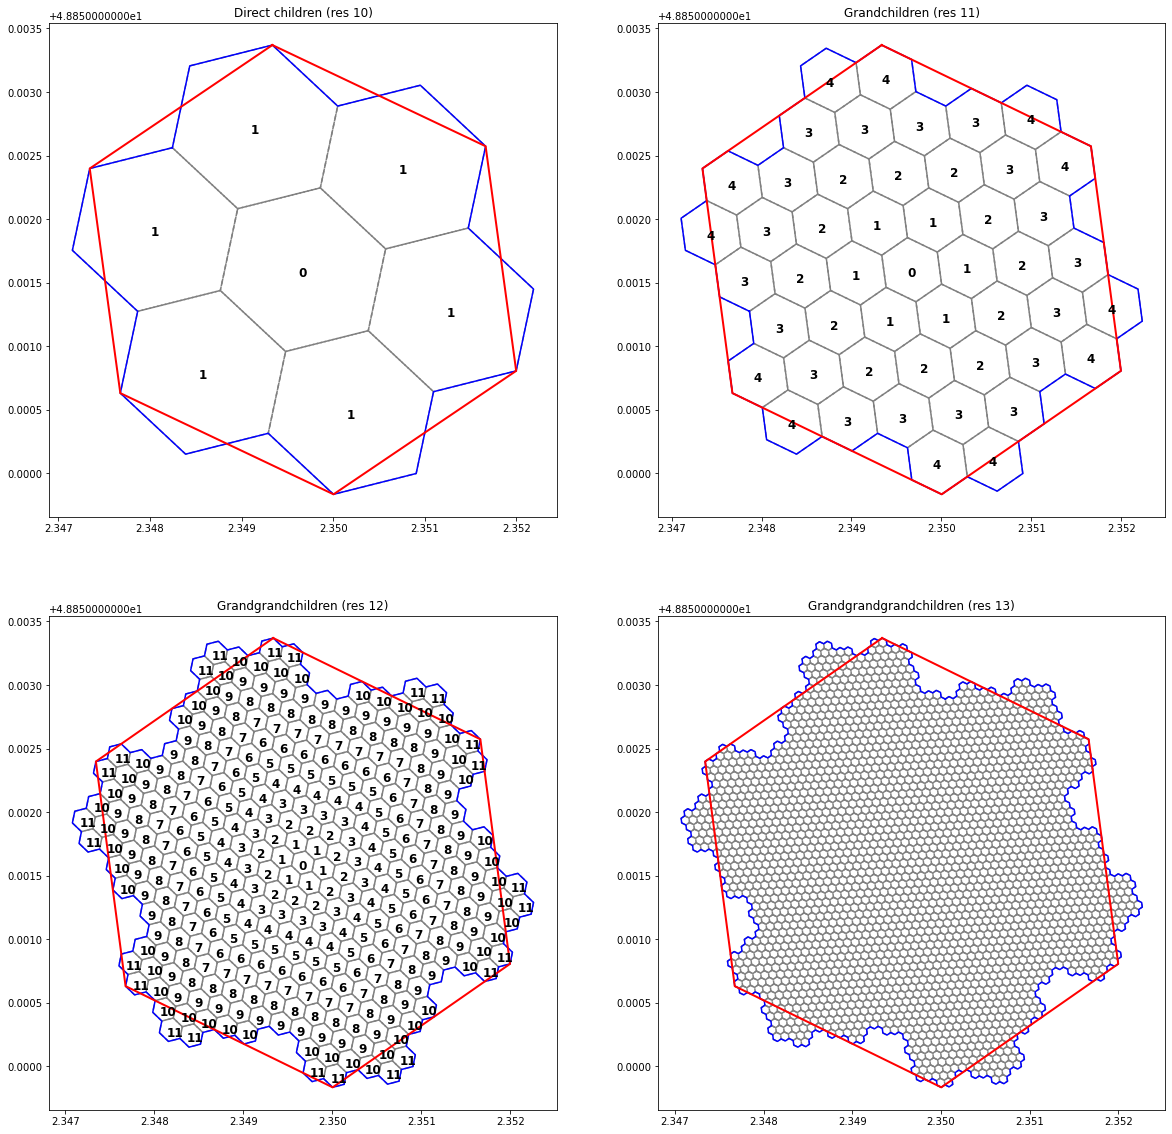

In [30]:
fig, ax = plt.subplots(2, 2, figsize = (20, 20))
list_distances_to_center_dc = plot_parent_and_descendents(h3_cell_parent, 
                                                          h3_cells_children, 
                                                          ax = ax[0][0])
list_distances_to_center_gc = plot_parent_and_descendents(h3_cell_parent,
                                                          h3_cells_grandchildren,
                                                          ax = ax[0][1])
list_distances_to_center_2xgc = plot_parent_and_descendents(h3_cell_parent, 
                                                            h3_cells_2xgrandchildren, 
                                                            ax = ax[1][0])
list_distances_to_center_3xgc = plot_parent_and_descendents(h3_cell_parent,
                                                            h3_cells_3xgrandchildren,
                                                            ax = ax[1][1])


ax[0][0].set_title("Direct children (res 10)")
ax[0][1].set_title("Grandchildren (res 11)")
ax[1][0].set_title("Grandgrandchildren (res 12)")
ax[1][1].set_title("Grandgrandgrandchildren (res 13)");
# ax[1][1].axis('off');

## 3.Disposition spatiale des cellules H3 dans le système de coordonnées ij

Voir: https://h3geo.org/docs/core-library/coordsystems


In [ ]:
help(h3.experimental_h3_to_local_ij)

In [31]:
def explore_ij_coords(lat_point, lon_point, num_rings = 3, ax = None):

    # an example at resolution 9
    hex_id_ex = h3.geo_to_h3(lat = lat_point,
                             lng = lon_point,
                             resolution = 9
                             )
    assert(h3.h3_get_resolution(hex_id_ex) == 9)

    # get its rings
    list_siblings = list(h3.hex_range_distances(h = hex_id_ex, 
                                                K = num_rings))

    dict_ij = {}
    dict_color = {}
    dict_s = {}

    if ax is None:
        figsize = (min(6 * num_rings, 15), min(6 * num_rings, 15))
        fig, ax = plt.subplots(1, 1, figsize = figsize)

    for ring_level in range(len(list_siblings)):

        if ring_level == 0:
            fontcol = "red"
        elif ring_level == 1:
            fontcol = "blue"
        elif ring_level == 2:
            fontcol = "green"
        else:
            fontcol = "brown"

        if ring_level == 0:
            # on ring 0 is only hex_id_ex
            geom_boundary_coords = h3.h3_to_geo_boundary(hex_id_ex,
                                                         geo_json = True)
            geom_shp = geometry.Polygon(geom_boundary_coords)
            ax.plot(*geom_shp.exterior.xy, color = "purple")

            ij_ex = h3.experimental_h3_to_local_ij(origin = hex_id_ex,
                                                   h = hex_id_ex)
            s = " {} \n \n (0,0)".format(ij_ex)

            dict_ij[hex_id_ex] = ij_ex
            dict_color[hex_id_ex] = "red"
            dict_s[hex_id_ex] = s        

            ax.text(x = geom_shp.centroid.x - 0.0017,
                    y = geom_shp.centroid.y - 0.0005,
                    s = s,
                    fontsize = 11, color = fontcol, weight = "bold")
        else:
            # get the hex ids resident on ring_level
            siblings_on_ring = list(list_siblings[ring_level])

            k = 1
            for sibling_hex in sorted(siblings_on_ring):
                geom_boundary_coords = h3.h3_to_geo_boundary(sibling_hex,
                                                             geo_json=True)
                geom_shp = geometry.Polygon(geom_boundary_coords)
                ax.plot(*geom_shp.exterior.xy, color = "purple")

                ij = h3.experimental_h3_to_local_ij(origin = hex_id_ex,
                                                    h = sibling_hex)
                ij_diff = (ij[0] - ij_ex[0], ij[1] - ij_ex[1])
                s = " {} \n \n {}".format(ij, ij_diff)
                k = k + 1

                dict_ij[sibling_hex] = ij    
                dict_color[sibling_hex] = fontcol
                dict_s[sibling_hex] = s

                ax.text(x = geom_shp.centroid.x - 0.0017,
                        y = geom_shp.centroid.y - 0.0005,
                        s = s,
                        fontsize = 11, color = fontcol, weight = "bold")

    ax.set_ylabel("Latitude")
    ax.set_xlabel("Longitude")
    
    return dict_ij, dict_color, dict_s

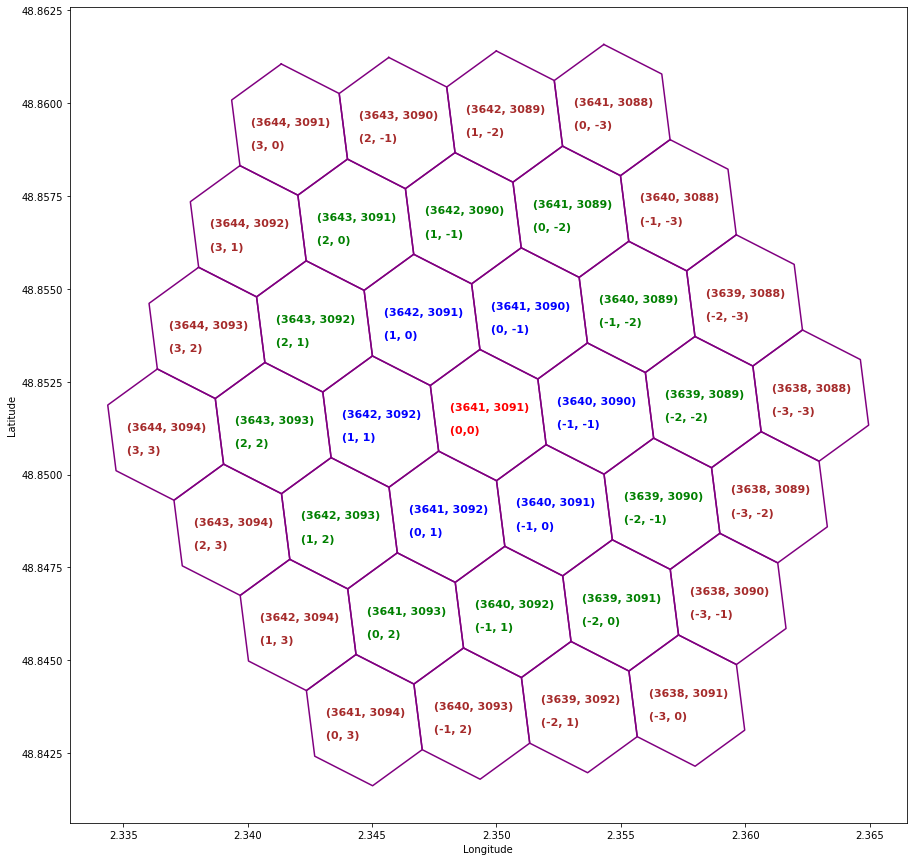

In [32]:
dict_ij, dict_color, dict_s = explore_ij_coords(lat_point = lat_centr_point,
                                                lon_point = lon_centr_point)

Notez que le choix d'un point GPS dans d'autres parties du monde entraîne des dispositions relatives i et j différentes (par rapport à la boussole NESW).  
Voici une illustration pour les voisins de l'anneau 1 : 


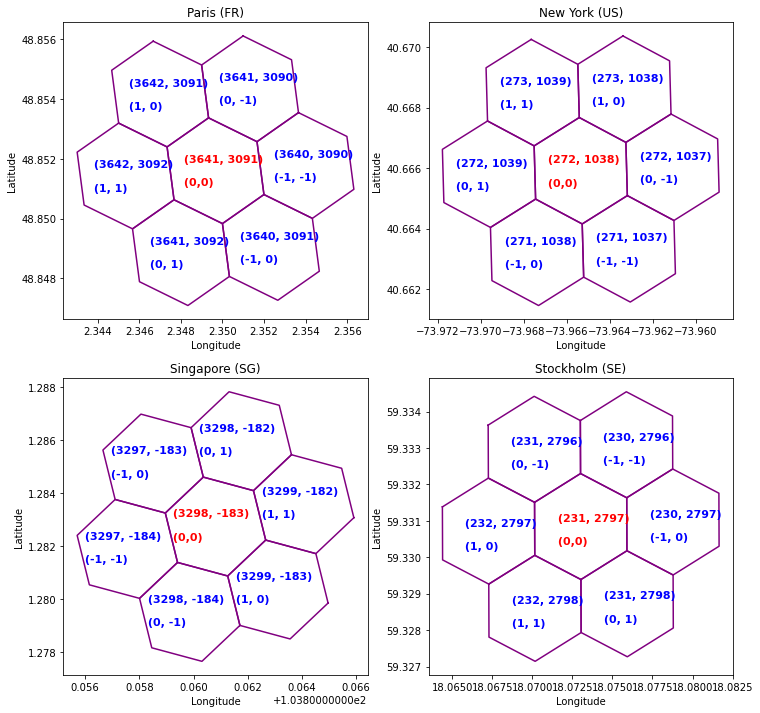

In [33]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))

# in Toulouse
_ = explore_ij_coords(lat_point = lat_centr_point,
                      lon_point = lon_centr_point,
                      num_rings = 1,
                      ax = ax[0][0])
ax[0][0].set_title("Paris (FR)")

# in New York
_ = explore_ij_coords(lat_point = 40.665634, 
                      lon_point = -73.964768,
                      num_rings = 1,
                      ax = ax[0][1])
ax[0][1].set_title("New York (US)")

# in Singapore
_ = explore_ij_coords(lat_point = 1.282892, 
                      lon_point = 103.862396,
                      num_rings = 1,
                      ax = ax[1][0])
ax[1][0].set_title("Singapore (SG)")


# in Stockholm 
_ = explore_ij_coords(lat_point = 59.330506, 
                      lon_point = 18.072043,
                      num_rings = 1,
                      ax = ax[1][1])
ax[1][1].set_title("Stockholm (SE)");

Anticipant la section ML de ce notebook, nous mettons ces 4 anneaux d'hexagones dans un tableau 2d.  
Une étape préliminaire consiste à transformer i et j comme suit :

In [34]:
min_i = min([dict_ij[h][0] for h in dict_ij])
min_j = min([dict_ij[h][1] for h in dict_ij])

max_i = max([dict_ij[h][0] for h in dict_ij])
max_j = max([dict_ij[h][1] for h in dict_ij])

print("i between {} and {}".format(min_i, max_i))
print("j between {} and {}".format(min_j, max_j))

# rescale
dict_ij_rescaled = {}
for h in dict_ij:
    dict_ij_rescaled[h] = [dict_ij[h][0] - min_i, dict_ij[h][1] - min_j]
    # print(dict_ij[h], "-->", dict_ij_rescaled[h])

i between 3638 and 3644
j between 3088 and 3094


In [37]:
import numpy as np

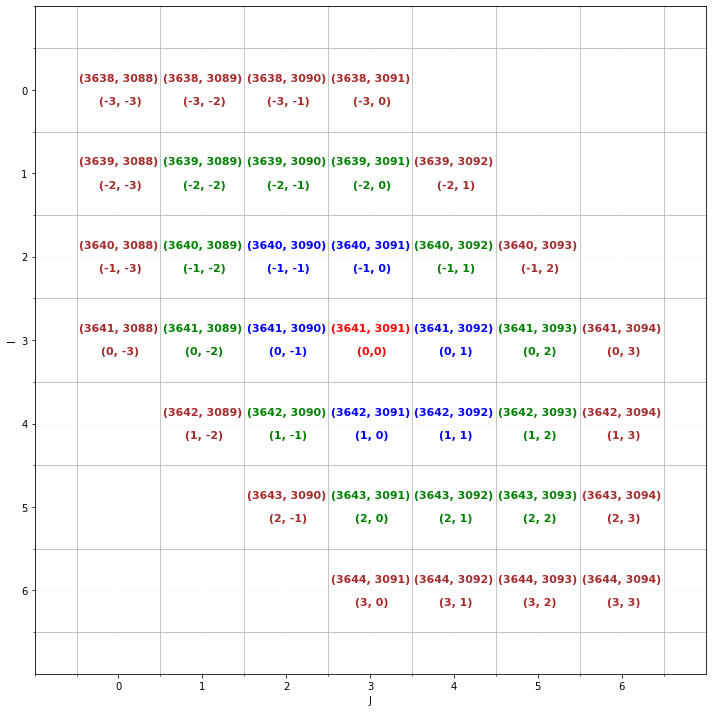

In [38]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

i_range = list(range(0, max_i - min_i + 1))
j_range = list(range(0, max_j - min_j + 1))


ax.set_xticks(np.arange(len(j_range)))
ax.set_yticks(np.arange(len(i_range)))
ax.set_xticklabels(j_range)
ax.set_yticklabels(i_range)

minor_ticks_x = np.arange(-1, max_j - min_j + 1, 0.5)
minor_ticks_y = np.arange(-1, max_i - min_i + 1, 0.5)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(minor_ticks_y, minor=True)

for h in dict_ij_rescaled:
    ax.text(x = dict_ij_rescaled[h][1],
            y = dict_ij_rescaled[h][0],
            s = dict_s[h],
            fontsize = 11, color = dict_color[h],
            ha="center", va="center", weight = "bold")
    
ax.set_xlim(-1, max_j - min_j + 1)
ax.set_ylim(-1, max_i - min_i + 1)

ax.grid(which='major', alpha = 0.1)
ax.grid(which='minor', alpha = 0.9)

ax.set_xlabel("J")
ax.set_ylabel("I")

ax.invert_yaxis()

fig.tight_layout();